In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Redge回帰
過学習を緩和する一つの方法として,モデルの正則化があげられる.リッジ回帰は線形回帰の正則化で,コスト関数に正則化項を加えること.正則化項を加えることで,学習アルゴリズムはモデルに適合することに加えてモデルの重さをできるだけ小さくしなければいけなくなる.ハイパーパラメータ$\alpha$とすると,リッジ回帰におけるコスト関数$J(\theta)$は次のように表される.
$$J(\theta) = MSE(\theta)+\frac{\alpha}{2}\sum_{i=1}^{n}\theta_i^2$$
ハイパーパラメータ$\alpha$はモデルをどの程度正則化するかを決定する.ハイパーパラメータ$\alpha$が0のとき,リッジ回帰は線形回帰になる.$\alpha$が非常に大きいときすべての重みが限りなく0に近づき,データは平均値を通る水平線になる.

In [2]:
df = pd.read_csv("data3.csv")
df.head()

,x,y
0,4.337520,7.763191
1,0.201284,7.851685
2,-0.504076,7.773407
3,0.812612,9.694481
4,4.670285,7.922672


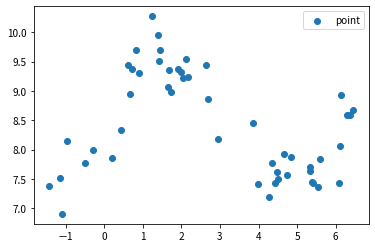

In [3]:
plt.figure(facecolor='white')
plt.scatter(df["x"],df["y"],label='point')
plt.legend()

## scikit-learnによるRedge回帰

In [4]:
degree = 4
from sklearn.preprocessing import PolynomialFeatures 

X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)

poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_features.fit_transform(X)

In [5]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1,solver="cholesky") # コレスキーの行列分解テクニック
model.fit(X_poly,y)

Ridge(alpha=1, solver='cholesky')

In [6]:
print("切片 : ",model.intercept_[0])
print("傾き : ",model.coef_)
print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y

切片 :  8.57547440359043
傾き :  [[ 0.8949188  -0.16031769 -0.07298733  0.01201288]]
決定係数 :  0.8077718940368315


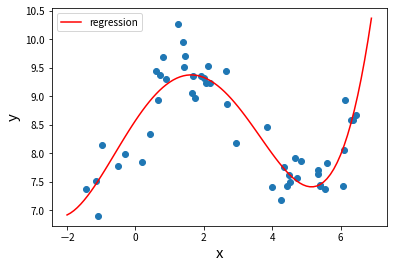

In [7]:
Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成
Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
ypred = model.predict(Xpred_poly) # 予測

plt.figure(facecolor="white")
plt.scatter(df["x"],df["y"])
plt.plot(Xpred,ypred,c="r",label="regression")
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend()
plt.show()

## ハイパーパラメータの効果

alpha :  0
切片 :  8.56597887870128
傾き :  [[ 0.93901737 -0.17501155 -0.07231767  0.01211205]]
回帰係数ベクトルのノルム :  0.9579974977405884
決定係数 :  0.8088602907393474

alpha :  1
切片 :  8.57547440359043
傾き :  [[ 0.8949188  -0.16031769 -0.07298733  0.01201288]]
回帰係数ベクトルのノルム :  0.9121693232130733
決定係数 :  0.8077718940368315

alpha :  10
切片 :  8.651852001923386
傾き :  [[ 0.63017781 -0.08817674 -0.0714023   0.01091736]]
回帰係数ベクトルのノルム :  0.6404035323771743
決定係数 :  0.7561351283881295



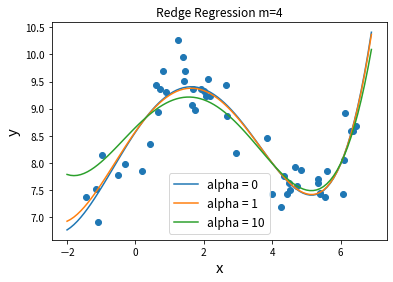

In [13]:
degree = 4
alphalist = [0,1,10]
Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成

poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_features.fit_transform(X)

plt.figure(facecolor="white")
for alpha in alphalist:
    model = Ridge(alpha=alpha,solver="cholesky") # コレスキーの行列分解テクニック
    model.fit(X_poly,y)
    print("alpha : ",alpha)
    print("切片 : ",model.intercept_[0])
    print("傾き : ",model.coef_)
    print("回帰係数ベクトルのノルム : ",np.linalg.norm(model.coef_))
    print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y
    print("") # 見た目
    Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
    ypred = model.predict(Xpred_poly) # 予測
    plt.plot(Xpred,ypred,label="alpha = "+str(alpha))

plt.scatter(df["x"],df["y"])
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend(fontsize=12)
plt.title("Redge Regression m="+str(degree))
plt.show()